# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler,MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [183]:
df = pd.read_csv('RTA_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023 entries, 0 to 9022
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         9023 non-null   object 
 1   Day_of_week                  9023 non-null   object 
 2   Age_band_of_driver           9023 non-null   object 
 3   Sex_of_driver                9023 non-null   object 
 4   Educational_level            8501 non-null   object 
 5   Vehicle_driver_relation      8645 non-null   object 
 6   Driving_experience           8423 non-null   object 
 7   Type_of_vehicle              8306 non-null   object 
 8   Owner_of_vehicle             8669 non-null   object 
 9   Service_year_of_vehicle      6055 non-null   object 
 10  Defect_of_vehicle            5727 non-null   object 
 11  Area_accident_occured        8846 non-null   object 
 12  Lanes_or_Medians             8728 non-null   object 
 13  Road_allignment   

In [5]:
df.shape

(9023, 32)

In [6]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [7]:
df.tail(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9013,21:45:00,Saturday,18-30,Male,Above high school,Owner,1-2yr,NaN,Owner,Above 10yr,...,Other,na,na,na,na,NaN,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9014,21:45:00,Saturday,Unknown,Female,Above high school,Employee,No Licence,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
9015,21:45:00,Saturday,Unknown,Female,Junior high school,Employee,1-2yr,Pick up upto 10Q,Owner,NaN,...,Reversing,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
9016,21:45:00,Saturday,31-50,Male,Junior high school,Employee,5-10yr,Public (12 seats),Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,Employee,NaN,Not a Pedestrian,Moving Backward,Slight Injury
9017,12:55:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),NaN,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
9018,12:55:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Governmental,NaN,...,Going straight,na,na,na,na,Driver,NaN,Not a Pedestrian,Overturning,Slight Injury
9019,12:55:00,Monday,31-50,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,na,na,na,na,Driver,NaN,Not a Pedestrian,No distancing,Slight Injury
9020,21:10:00,Saturday,31-50,Male,Elementary school,Employee,2-5yr,Public (13?45 seats),Owner,Below 1yr,...,Moving Backward,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9021,21:10:00,Saturday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9022,8:40:00,Thursday,31-50,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3420,10:12:00,Monday,31-50,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,5-10yrs,...,Moving Backward,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
8530,4:10:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
891,18:30:00,Thursday,18-30,Unknown,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
7990,11:30:00,Saturday,31-50,Male,Junior high school,Employee,2-5yr,Taxi,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
3083,22:20:00,Monday,Under 18,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,2-5yrs,...,Going straight,Pedestrian,Female,31-50,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1176,16:40:00,Saturday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,NaN,...,Getting off,na,na,na,na,Driver,Blind,Not a Pedestrian,Overtaking,Slight Injury
5085,20:40:00,Thursday,18-30,Male,High school,Employee,2-5yr,Public (13?45 seats),Owner,Unknown,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
6280,17:21:00,Thursday,18-30,Male,Junior high school,Owner,5-10yr,Automobile,Owner,NaN,...,Going straight,Passenger,Female,Under 18,3,NaN,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8501,7:10:00,Wednesday,18-30,Male,Junior high school,Employee,NaN,Ridden horse,Owner,NaN,...,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5118,16:34:00,Monday,Over 51,Male,Above high school,Owner,2-5yr,Lorry (41?100Q),Owner,NaN,...,Going straight,na,na,na,na,Other,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury


In [22]:
df.describe()

,Age_band_of_driver,Driving_experience,Service_year_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Sex_of_driver_Female,Sex_of_driver_Male,Educational_level_Above high school,...,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo
count,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,...,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000
mean,0.758284,1.941594,1.318298,0.170047,0.074690,0.870664,1.928627,0.056855,0.943145,0.027707,...,0.098194,0.065278,0.058628,0.043777,0.032583,0.006317,0.006206,0.055081,0.021279,0.003657
std,0.900492,1.217084,0.836690,0.107183,0.143353,1.338020,0.268421,0.231578,0.231578,0.164141,...,0.297593,0.247029,0.234940,0.204610,0.177553,0.079234,0.078540,0.228152,0.144321,0.060368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.166667,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.166667,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.166667,0.142857,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,5.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().value_counts().sum()

9023

In [12]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,522
Vehicle_driver_relation,378
Driving_experience,600
Type_of_vehicle,717
Owner_of_vehicle,354
Service_year_of_vehicle,2968


In [13]:
df.replace(['na', 'Unknown', 'nan','NaN','unknown','None'], None, inplace=True)

In [62]:
#to normalize the dataset
df.Type_of_vehicle.replace('Lorry (41?100Q)', 'Lorry', inplace=True)
df.Type_of_vehicle.replace('Public (> 45 seats)', 'Public', inplace=True)
df.Type_of_vehicle.replace('Long lorry', 'Lorry', inplace=True)
df.Type_of_vehicle.replace('Lorry (11?40Q)', 'Lorry', inplace=True)
df.Type_of_vehicle.replace('Public (12 seats)', 'Public', inplace=True)
df.Type_of_vehicle.replace('Pick up upto 10Q', 'Pickup', inplace=True)
df.Type_of_vehicle.replace('Public (13?45 seats)', 'Public', inplace=True)
df.Type_of_vehicle.replace('Public (9 seats)', 'Public', inplace=True)

In [42]:
df.sample(20)

,Time,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Severity_Index,Severity
7535,17:23:00,Thursday,0,Junior high school,2,Public,Owner,1,No defect,Residential areas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.047619
1185,13:30:00,Thursday,1,Junior high school,3,Other,Owner,2,No defect,Office areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023810,0.023810
8798,13:40:00,Thursday,3,Elementary school,3,Lorry,Owner,1,No defect,Office areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8843,11:00:00,Wednesday,1,Elementary school,0,Lorry,Owner,3,No defect,Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023810,0.023810
7637,19:00:00,Monday,0,Junior high school,1,Automobile,Owner,1,No defect,Church areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4733,13:00:00,Sunday,0,Junior high school,2,Public,Owner,0,No defect,Hospital areas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2658,7:58:00,Wednesday,0,Junior high school,2,Stationwagen,Owner,1,No defect,Other,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000
3134,19:23:00,Wednesday,2,Junior high school,2,Automobile,Owner,1,No defect,Office areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6861,18:00:00,Saturday,3,High school,1,Lorry,Owner,1,No defect,Residential areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
7588,19:30:00,Thursday,3,Junior high school,0,Automobile,Governmental,1,No defect,Office areas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.047619


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [43]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].mean(), inplace=True)

In [44]:
for column in df.select_dtypes(include='object'):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [75]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [79]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0], inplace=True)
df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0], inplace=True)
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)

In [80]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Educational_level,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,0


In [46]:
numerical_cols = df.select_dtypes(include=np.number).columns
minmax_scaler = MinMaxScaler()

df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

In [63]:
df.select_dtypes(exclude=['number'])

,Time,Day_of_week,Educational_level,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,Above high school,Automobile,Owner,No defect,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,...,Normal,Collision with roadside-parked vehicles,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,Junior high school,Public,Owner,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,Junior high school,Lorry,Owner,No defect,Recreational areas,other,Tangent road with flat terrain,No junction,...,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,Junior high school,Public,Governmental,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,...,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,Junior high school,Automobile,Owner,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,12:55:00,Monday,Junior high school,Lorry,Governmental,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,Y Shape,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury
9019,12:55:00,Monday,Junior high school,Lorry,Owner,No defect,School areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9020,21:10:00,Saturday,Elementary school,Public,Owner,No defect,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,...,Normal,Vehicle with vehicle collision,Moving Backward,Driver or rider,Male,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9021,21:10:00,Saturday,Junior high school,Lorry,Owner,No defect,Office areas,other,Tangent road with mountainous terrain and,No junction,...,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Female,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [109]:
le = LabelEncoder()

df['Age_band_of_driver'] = le.fit_transform(df['Age_band_of_driver'])

df['Driving_experience'] = le.fit_transform(df['Driving_experience'])

df['Service_year_of_vehicle'] = le.fit_transform(df['Service_year_of_vehicle'])

df['Age_band_of_casualty'] = le.fit_transform(df['Age_band_of_casualty'])

df['Casualty_severity'] = le.fit_transform(df['Casualty_severity'])

df['Area_accident_occured'] = le.fit_transform(df['Area_accident_occured'])

df['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])

df['Road_allignment'] = le.fit_transform(df['Road_allignment'])

df['Road_surface_type'] = le.fit_transform(df['Road_surface_type'])

df['Road_surface_conditions'] = le.fit_transform(df['Road_surface_conditions'])

df['Light_conditions'] = le.fit_transform(df['Light_conditions'])

df['Weather_conditions'] = le.fit_transform(df['Weather_conditions'])

df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

In [67]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)#sparse_output>>to creat sparse matrix (when larde number is 0)

Sex_of_driver_encoded = ohe.fit_transform(df[['Sex_of_driver']])
Sex_of_driver_encoded_df = pd.DataFrame(Sex_of_driver_encoded, columns=ohe.get_feature_names_out(['Sex_of_driver']))

Educational_level_encoded = ohe.fit_transform(df[['Educational_level']])
Educational_level_encoded_df = pd.DataFrame(Educational_level_encoded, columns=ohe.get_feature_names_out(['Educational_level']))

# Concatenate the original dataframe with the new one-hot encoded dataframes
df_one_hot = pd.concat([df, Sex_of_driver_encoded_df, Educational_level_encoded_df,Type_of_vehicle_encoded_df], axis=1)

# Drop original columns if not needed
df_one_hot.drop(['Sex_of_driver', 'Vehicle_driver_relation'], axis=1, inplace=True)

df = df_one_hot

KeyError: "None of [Index(['Sex_of_driver'], dtype='object')] are in the [columns]"

In [69]:
df.shape

(9023, 57)

In [186]:
#handle outliers by IQR
numerical_df = df.select_dtypes(include=['number'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [188]:
numerical_cols = numerical_df.columns

# Cap outliers
df_capped = df.copy()
df_capped[numerical_cols] = np.clip(df_capped[numerical_cols], lower_bound, upper_bound, axis=1)

In [189]:
#Create a new feature by combining existing features
df['Severity'] = df['Number_of_vehicles_involved'] * df['Number_of_casualties']

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

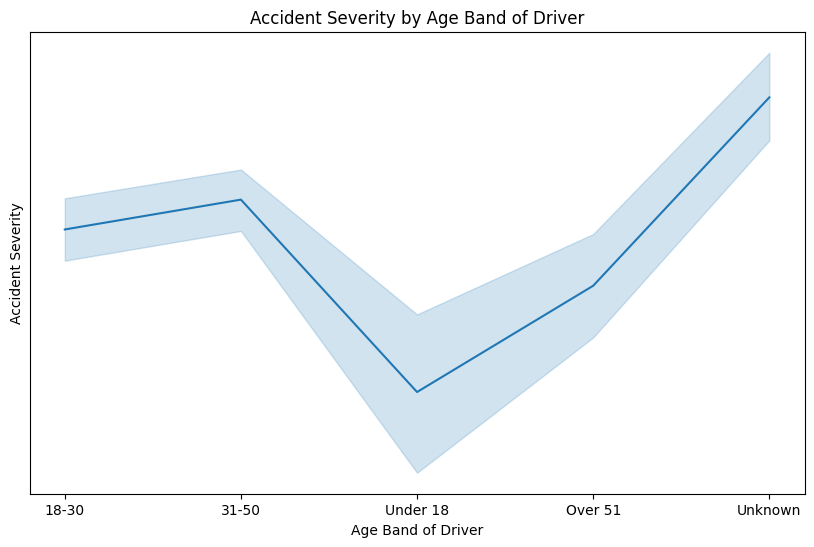

In [192]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age_band_of_driver', y='Accident_severity', data=df)
plt.title('Accident Severity by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Accident Severity')
plt.show()

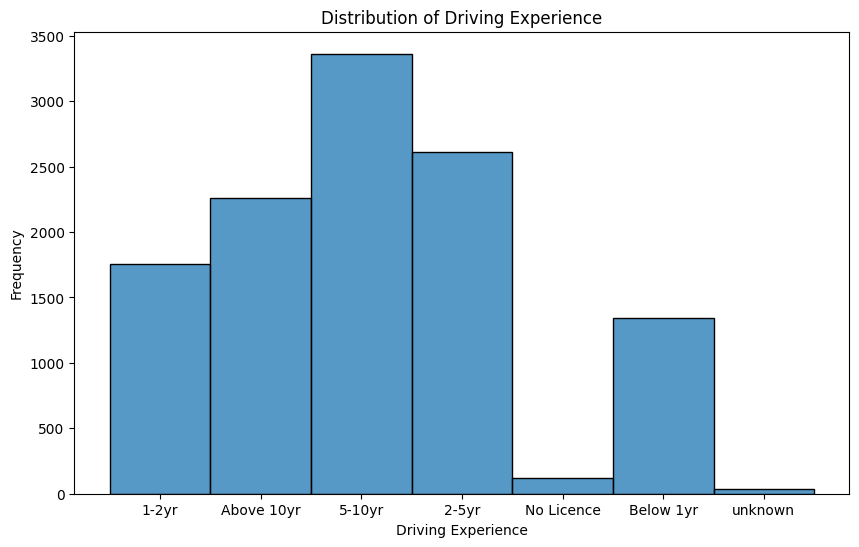

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Driving_experience'], bins=10)
plt.title('Distribution of Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Frequency')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [84]:
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level',
       'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male',
       'Educational_level_Above high school',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Educational_level_Illiterate', 'Educational_level_Junior high school',
       'Educational_level_Writing &

In [112]:
dfML = df[['Accident_severity','Area_accident_occured','Cause_of_accident','Road_allignment','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions']]
dfML.head(10)

,Accident_severity,Area_accident_occured,Cause_of_accident,Road_allignment,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions
0,2,9,9,5,0,0,3,2
1,2,6,16,5,0,0,3,2
2,1,1,0,5,0,0,3,2
3,2,6,1,6,2,0,0,2
4,2,4,16,5,0,0,0,2
5,2,7,14,5,0,0,3,2
6,2,9,13,5,0,0,3,2
7,2,9,12,5,0,0,3,2
8,2,4,1,5,2,0,3,2
9,1,9,9,5,0,0,3,2


In [113]:
x = dfML[['Area_accident_occured','Cause_of_accident','Road_allignment','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions']]
y = dfML['Accident_severity']

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [116]:
# Group the data by 'Area_accident_occured' and count the number of accidents in each area
area_counts = dfML['Area_accident_occured'].value_counts()

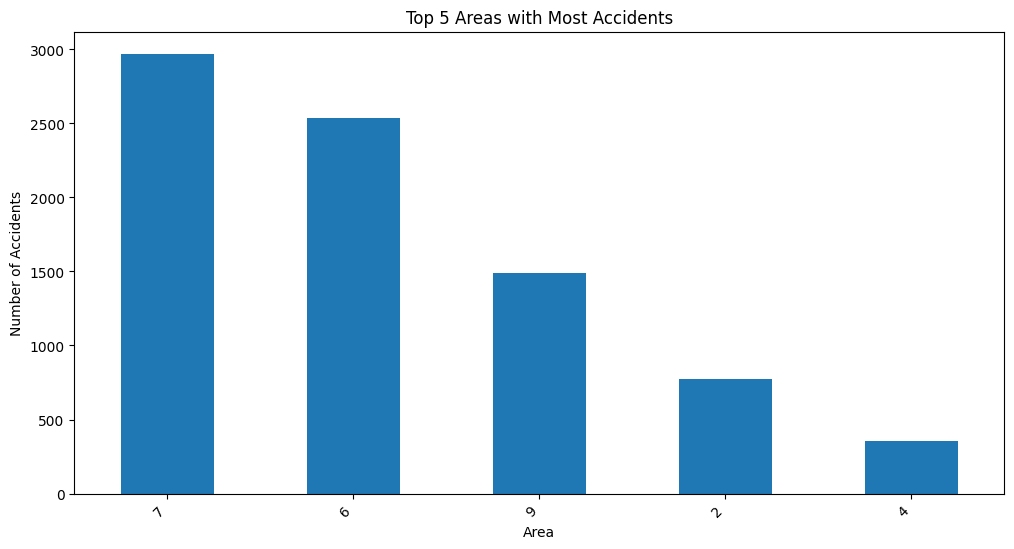

In [180]:
# Plot the top 5 areas with the most accidents
top_n = 5
plt.figure(figsize=(12, 6))
area_counts.head(top_n).plot(kind='bar')
plt.title('Top {} Areas with Most Accidents'.format(top_n))
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [94]:
# Analyze the causes of accidents in the area with the most accidents
most_accident_area = area_counts.index[0]
area_data = dfML[dfML['Area_accident_occured'] == most_accident_area]

In [178]:
cause_counts = area_data['Cause_of_accident'].value_counts()

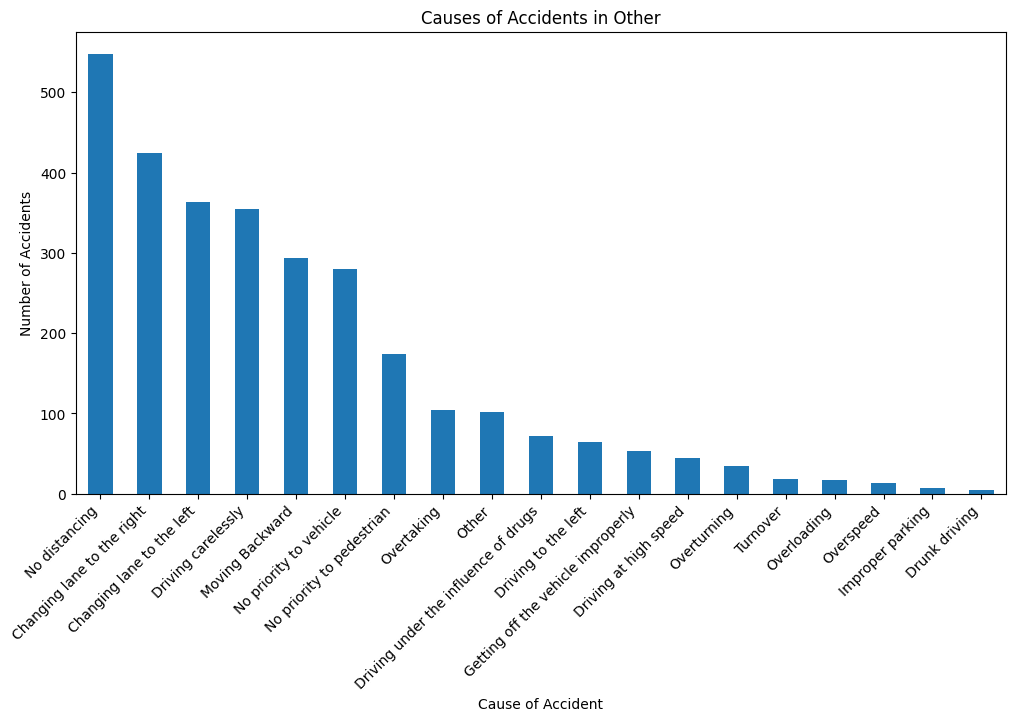

In [179]:
plt.figure(figsize=(12, 6))
cause_counts.plot(kind='bar')
plt.title('Causes of Accidents in {}'.format(most_accident_area))
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

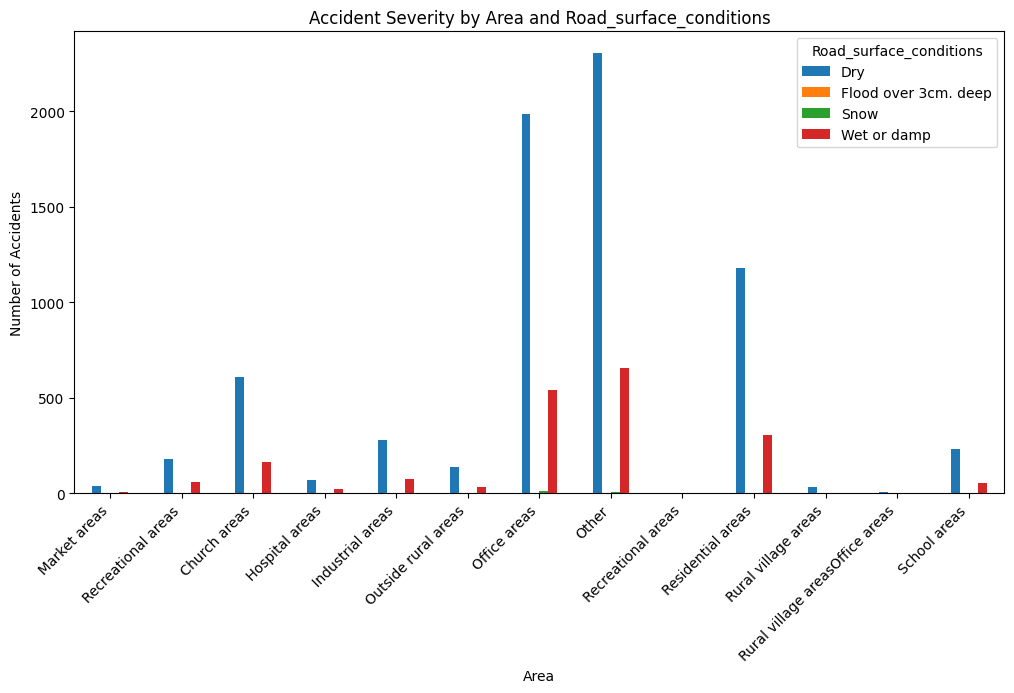

In [99]:
#analyze the relationship between 'Area_accident_occured' and 'Road_allignment':
area_surface_counts = dfML.groupby(['Area_accident_occured', 'Road_surface_conditions'])['Accident_severity'].count().unstack()
area_surface_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Accident Severity by Area and Road_surface_conditions')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Road_surface_conditions')
plt.show()

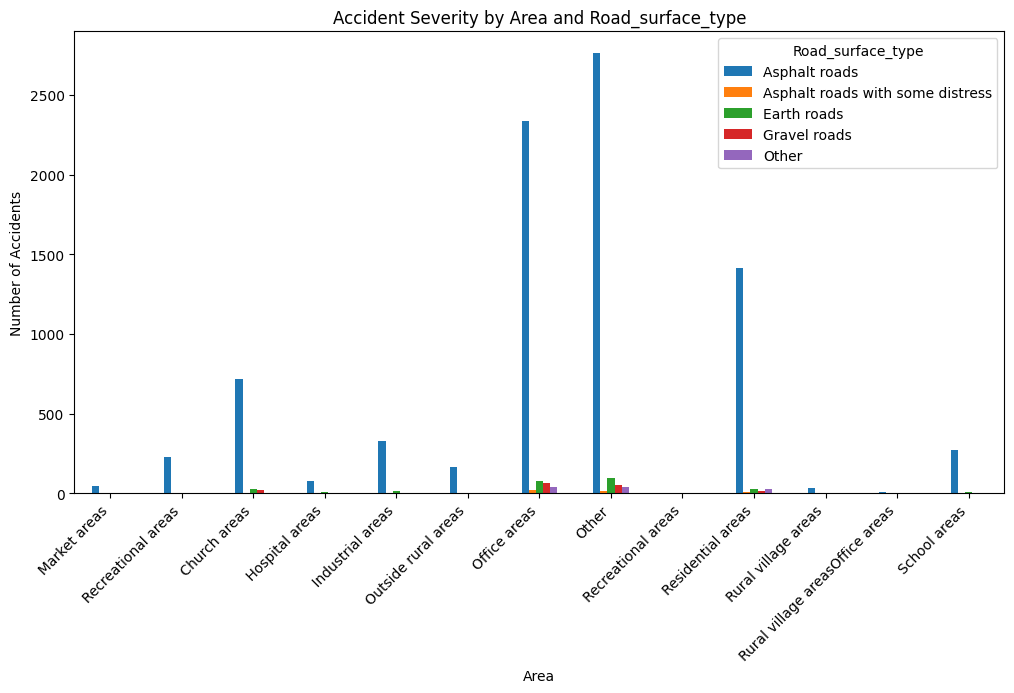

In [100]:
area_type_counts = dfML.groupby(['Area_accident_occured', 'Road_surface_type'])['Accident_severity'].count().unstack()
area_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Accident Severity by Area and Road_surface_type')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Road_surface_type')
plt.show()

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [176]:
model1 = LogisticRegression()

model1.fit(x_train, y_train)

y_pred_model1 = model1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [143]:
model2 = DecisionTreeClassifier()

model2.fit(x_train, y_train)

y_pred_model2 = model2.predict(x_test)

#### Support Vector Machine (SVM)

In [144]:
model3 = SVC()

model3.fit(x_train, y_train)

y_pred_model3 = model3.predict(x_test)

#### K-Neighbors Classifier

In [145]:
model4 = KNeighborsClassifier()

model4.fit(x_train, y_train)

y_pred_model4 = model4.predict(x_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [177]:
cm_model1 = confusion_matrix(y_test, y_pred_model1)
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
precision_model1 = precision_score(y_test, y_pred_model1, average='macro')
recall_model1 = recall_score(y_test, y_pred_model1, average='macro')
f1_model1 = f1_score(y_test, y_pred_model1, average='macro')

print("Model 1 (Logistic Regression):")
print("Confusion Matrix - Logistic Regression:")
print(cm_model1)
print("Accuracy:", accuracy_model1)
print("Precision:", precision_model1)
print("Recall:", recall_model1)
print("F1-score:", f1_model1)

Model 1 (Logistic Regression):
Confusion Matrix - Logistic Regression:
[[   0    0   22]
 [   0    0  233]
 [   0    0 1550]]
Accuracy: 0.8587257617728532
Precision: 0.28624192059095105
Recall: 0.3333333333333333
F1-score: 0.3079980129160457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
cm_model2 = confusion_matrix(y_test, y_pred_model2)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
precision_model2 = precision_score(y_test, y_pred_model2, average='macro')
recall_model2 = recall_score(y_test, y_pred_model2, average='macro')
f1_model2 = f1_score(y_test, y_pred_model2, average='macro')

print("Model 2 (Decision Tree Classifier):")
print("\nConfusion Matrix - Decision Tree Classifier:")
print(cm_model2)
print("Accuracy:", accuracy_model2)
print("Precision:", precision_model2)
print("Recall:", recall_model2)
print("F1-score:", f1_model2)
print("\n")

Model 2 (Decision Tree Classifier):

Confusion Matrix - Decision Tree Classifier:
[[   0    0   22]
 [   1   13  219]
 [   7   97 1446]]
Accuracy: 0.8083102493074792
Precision: 0.32510822510822507
Recall: 0.3295657390742535
F1-score: 0.3230738608166688




In [174]:
cm_model3 = confusion_matrix(y_test, y_pred_model3)
accuracy_model3 = accuracy_score(y_test, y_pred_model3)
precision_model3 = precision_score(y_test, y_pred_model3, average='macro')
recall_model3 = recall_score(y_test, y_pred_model3, average='macro')
f1_model3 = f1_score(y_test, y_pred_model3, average='macro')

print("Model 3 (Support Vector Machine):")
print("\nConfusion Matrix - Support Vector Machine (SVM):")
print(cm_model3)
print("Accuracy:", accuracy_model3)
print("Precision:", precision_model3)
print("Recall:", recall_model3)
print("F1-score:", f1_model3)
print("\n")

Model 3 (Support Vector Machine):

Confusion Matrix - Support Vector Machine (SVM):
[[   0    0   22]
 [   0    0  233]
 [   0    0 1550]]
Accuracy: 0.8587257617728532
Precision: 0.28624192059095105
Recall: 0.3333333333333333
F1-score: 0.3079980129160457




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
cm_model4 = confusion_matrix(y_test, y_pred_model4)
accuracy_model4 = accuracy_score(y_test, y_pred_model4)
precision_model4 = precision_score(y_test, y_pred_model4, average='macro')
recall_model4 = recall_score(y_test, y_pred_model4, average='macro')
f1_model4 = f1_score(y_test, y_pred_model4, average='macro')

print("Model 4 (K-Neighbors Classifier):")
print("\nConfusion Matrix - K-Neighbors Classifier:")
print(cm_model4)
print("Accuracy:", accuracy_model4)
print("Precision:", precision_model4)
print("Recall:", recall_model4)
print("F1-score:", f1_model4)

Model 4 (K-Neighbors Classifier):

Confusion Matrix - K-Neighbors Classifier:
[[   0    1   21]
 [   0    0  233]
 [   0   24 1526]]
Accuracy: 0.8454293628808864
Precision: 0.2857677902621723
Recall: 0.3281720430107527
F1-score: 0.3055055055055055


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.


The line plot with x axis of age band of driver and y axis of accident severity shows that drivers over 51 has the highest accident severity

The histogram plot shows that drivers with driving experience of 5 to 10 years old has the highest frequency of accidents which is almost 3500 accidents in total

For the model the following columns were chosen to train and test the model:
1- Accident severity (y axis)
2- Area accident occurred (x axis)
3- Cause of accident (x axis)
4- Road alignment (x axis)
5- Road surface type (x axis)
6- Road surface condition (x axis)
7- Light conditions (x axis)
8- Weather conditions (x axis)

Visualizing Number of accidents and Area shows that the most common area of accidents is number 6 with almost 2500 accidents (7 was excluded because the area is “unknown”)

Visualizing number of accidents with the cause of accidents, shows that the top reason for accidents is “No distance”

Visualizing the number of accidents and area with road surface conditions shows that having wet floor isn’t the reason for accidents and it is more common to have accidents in dry surfaces




**1. Metrics comparison**

**Accuracy:** Logistic Regression and SVM have the highest accuracy at 0.8587, then K-Neighbors at 0.8454 and Decision Tree at 0.8083.

**Precision:** Decision Tree Classifier has the highest precision at 0.3251, while the others have similar precision score around 0.286.

**Recall:** Logistic Regression and SVM have the highest recall at 0.3333, then Decision Tree at 0.3296.

**F1-Score:** Decision Tree Classifier has the highest F1-score at 0.3231, with Logistic Regression and SVM being around 0.308.

**2. Evaluate Trade-offs**
**Computational Eficiency:** Logistic Regression and SVM be more computationally efficient compared to Decision Trees and K-Neighbor Classifier.

**Ease of Implementation:** Logistic Regression and Decision Trees are relatively easier to implement compared to SVM and K-Neighbor

**Model Interpetability:** Logistic Regression and Decision Trees provide better interpretability.

**3. Justify Your Choice**
based on the metrics and trade-offs, Logistic Regression or SVM would be the best choice.
They provide the highest accuracy and recall, which is cruical.